In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('synthetic_passenger_data.csv')

df

,Age,Fare,Sex,Embarked,Pclass,Survived
0,41.0,83.94,male,n,1,0
1,33.3,54.00,female,C,3,0
2,42.8,47.76,female,S,2,0
3,53.3,48.49,male,Q,3,0
4,32.2,17.82,male,S,1,0
...,...,...,...,...,...,...
195,39.6,5.06,female,S,2,0
196,24.4,5.00,male,S,3,1
197,36.8,41.90,male,S,1,0
198,NaN,54.82,male,Q,3,0


In [3]:
# get the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       185 non-null    float64
 1   Fare      191 non-null    float64
 2   Sex       200 non-null    object 
 3   Embarked  200 non-null    object 
 4   Pclass    200 non-null    int64  
 5   Survived  200 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Fare,Pclass,Survived
count,185.000000,191.000000,200.00000,200.000000
mean,34.332973,46.880209,2.34000,0.420000
std,10.962939,71.905342,0.81098,0.494797
min,3.600000,0.440000,1.00000,0.000000
25%,26.400000,12.075000,2.00000,0.000000
50%,35.100000,30.320000,3.00000,0.000000
75%,40.800000,56.460000,3.00000,1.000000
max,64.600000,579.000000,3.00000,1.000000


In [5]:
df.head()

,Age,Fare,Sex,Embarked,Pclass,Survived
0,41.0,83.94,male,n,1,0
1,33.3,54.00,female,C,3,0
2,42.8,47.76,female,S,2,0
3,53.3,48.49,male,Q,3,0
4,32.2,17.82,male,S,1,0


In [6]:
df.tail()

,Age,Fare,Sex,Embarked,Pclass,Survived
195,39.6,5.06,female,S,2,0
196,24.4,5.00,male,S,3,1
197,36.8,41.90,male,S,1,0
198,NaN,54.82,male,Q,3,0
199,NaN,35.02,female,S,3,1


In [7]:
# checking datatypes

df.dtypes

Age         float64
Fare        float64
Sex          object
Embarked     object
Pclass        int64
Survived      int64
dtype: object

In [8]:
# checking duplicates

df.duplicated().sum()

0

In [10]:
# checking null values

df.isnull().sum()

Age         15
Fare         9
Sex          0
Embarked     0
Pclass       0
Survived     0
dtype: int64

In [12]:
# check null values percentage

(df.isnull().sum()/len(df))*100

Age         7.5
Fare        4.5
Sex         0.0
Embarked    0.0
Pclass      0.0
Survived    0.0
dtype: float64

In [13]:
df['Age'].describe()

count    185.000000
mean      34.332973
std       10.962939
min        3.600000
25%       26.400000
50%       35.100000
75%       40.800000
max       64.600000
Name: Age, dtype: float64

In [14]:
df['Age'].median()

35.1

In [20]:
df['Age'].value_counts().head(2)   # top_2 mode

Age
44.9    4
39.3    3
Name: count, dtype: int64

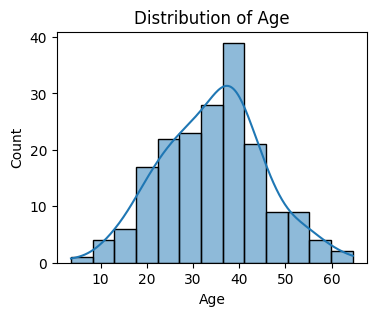

In [24]:
plt.figure(figsize=(4,3))

sns.histplot(df['Age'],kde=True)

plt.title("Distribution of Age")

plt.show()

In [26]:
df['Age'].skew()   # very few outliers (negligible)

0.029616359383541385

In [27]:
df['Age'].kurt()

-0.07677204354295553

**We can choose mean, as there are no significant outliers in age feature**

In [29]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [30]:
df['Age'].isnull().sum()

0

In [32]:
df['Fare'].describe()

count    191.000000
mean      46.880209
std       71.905342
min        0.440000
25%       12.075000
50%       30.320000
75%       56.460000
max      579.000000
Name: Fare, dtype: float64

In [33]:
df['Fare'].median()

30.32

In [34]:
df['Fare'].value_counts().head(2)

Fare
3.83    2
7.61    2
Name: count, dtype: int64

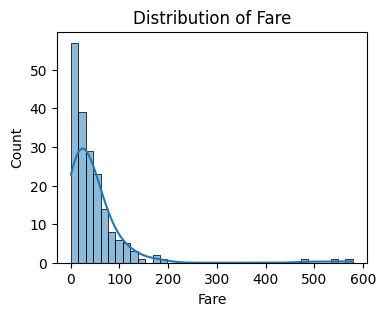

In [35]:
plt.figure(figsize=(4,3))

sns.histplot(df['Fare'],kde=True)

plt.title("Distribution of Fare")

plt.show()

In [36]:
# look at outliers using IQR

df['Fare'].describe()

count    191.000000
mean      46.880209
std       71.905342
min        0.440000
25%       12.075000
50%       30.320000
75%       56.460000
max      579.000000
Name: Fare, dtype: float64

In [39]:
q1 = 12
q3 = 56

iqr = q3-q1

lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)

print(lower,upper)

-54.0 122.0


In [42]:
df_test = df[(df['Fare']>=-54) & (df['Fare']<=122)]

In [43]:
df_test['Fare'].describe()

count    181.000000
mean      34.719061
std       29.304768
min        0.440000
25%        9.720000
50%       27.980000
75%       53.560000
max      120.320000
Name: Fare, dtype: float64

In [44]:
df['Fare'].fillna(34.719061,inplace=True)

In [45]:
df['Fare'].isnull().sum()

0